In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn для отрисовки графиков

In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Thyroid_Diff.csv')

In [ ]:
train.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


**Age**: Возраст пациента. Указывается в полных годах. Если возраст менее года, указывается дробное значение. В случае отсутствия точной информации используется приближенное значение в формате xx.5.

**Gender**: Пол пациента. Возможные значения — "F" для женщин и "M" для мужчин.

**Smoking**: Информация о том, курит ли пациент. "Yes" означает, что пациент курит, "No" — что не курит.

**Hx Smoking**: История курения пациента. "Yes" означает, что пациент имел привычку курить в прошлом, "No" — что не имел.

**Hx Radiothreapy**: История радиотерапии. "Yes" означает, что пациент подвергался радиотерапии в прошлом, "No" — что не подвергался.

**Thyroid Function**: Функция щитовидной железы. Например, "Euthyroid" означает нормальную функцию щитовидной железы.

**Physical Examination**: Результаты физикального обследования. Описывает выявленные изменения, такие как "Single nodular goiter-left" (одиночное узловое увеличение слева) или "Multinodular goiter" (многовузловой зоб).

**Adenopathy**: Наличие аденопатии. "Yes" означает наличие увеличения лимфатических узлов, "No" — отсутствие.

**Pathology**: Тип патологии. Например, "Micropapillary" обозначает микропапиллярную опухоль.

**Focalit**y: Очаговость. Указывает на наличие очаговых изменений: "Uni-Focal" (одиночный очаг) или "Multi-Focal" (многоочаговый).

**Risk**: Уровень риска. Указывает на степень риска развития заболевания, например, "Low" (низкий).

**T**: Т стадия по классификации TNM. Например, "T1a" указывает на раннюю стадию опухоли.

**N**: N стадия по классификации TNM. Например, "N0" означает отсутствие метастазов в лимфатических узлах.

**M**: M стадия по классификации TNM. Например, "M0" указывает на отсутствие метастазов в отдаленных органах.

**Stage**: Стадия заболевания. Указывает на общий этап заболевания, например, "I" для первой стадии.

**Response**: Ответ на лечение. Описание результата лечения, например, "Excellent" (отличный) или "Indeterminate" (неопределенный).

**Recurred**: Наличие рецидива заболевания. "Yes" означает, что заболевание рецидивировало, "No" — что нет.

In [ ]:
train.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [ ]:
train.describe(include=['O'])

,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
count,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383,383
unique,2,2,2,2,5,5,6,4,2,3,7,3,2,5,4,2
top,F,No,No,No,Euthyroid,Multinodular goiter,No,Papillary,Uni-Focal,Low,T2,N0,M0,I,Excellent,No
freq,312,334,355,376,332,140,277,287,247,249,151,268,365,333,208,275


**Промежуточные итоги**

**Распределение по категориям:**

*Gender*: Большинство пациентов — женщины (312 из 383).

*Smoking*: Большинство пациентов не курят (334 из 383).

*Hx Smoking*: Большинство пациентов не имели истории курения (355 из 383).

*Hx Radiothreapy*: Большинство пациентов не подвергались радиотерапии (376 из 383).

*Thyroid Function*: Наиболее частое состояние функции щитовидной железы — "Euthyroid" (332 из 383).

*Physical Examination*: Наиболее часто встречаемое состояние — "Multinodular goiter" (140 из 383).

*Adenopathy*: Большинство пациентов не имеют аденопатии (277 из 383).

*Pathology*: Наиболее часто встречающаяся патология — "Papillary" (287 из 383).

*Focality*: Чаще всего наблюдается одиночный очаг (247 из 383).

*Risk*: Наиболее часто встречаемый уровень риска — "Low" (249 из 383).

*T*: Наиболее часто встречаемая стадия — "T2" (151 из 383).

*N*: Наиболее частая стадия — "N0" (268 из 383).

*M*: Наиболее частая стадия — "M0" (365 из 383).

*Stage*: Наиболее часто встречаемая стадия заболевания — "I" (333 из 383).

*Response*: Наиболее частый ответ на лечение — "Excellent" (275 из 383).

*Recurred*: Большинство пациентов не имели рецидива (275 из 383).

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
train.isnull().sum()

,0
Age,0
Gender,0
Smoking,0
Hx Smoking,0
Hx Radiothreapy,0
Thyroid Function,0
Physical Examination,0
Adenopathy,0
Pathology,0
Focality,0


In [ ]:
# Замена категориальных данных количественными
train_encoded = pd.get_dummies(train, drop_first=True)

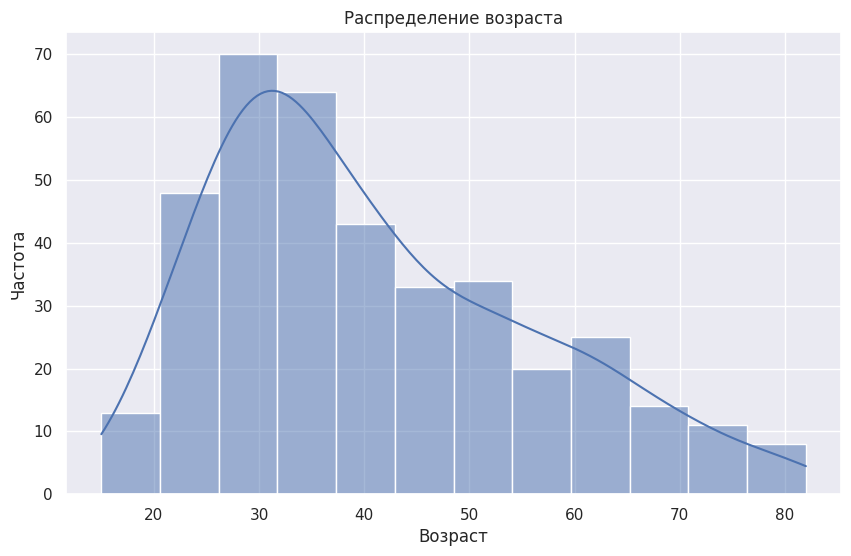

In [ ]:
# Визуализация для признака 'Age'
plt.figure(figsize=(10, 6))
sns.histplot(train['Age'], kde=True)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Гистограмма отображает распределение возраста в наборе данных. Линия KDE (ядерная оценка плотности) показывает сглаженное распределение возраста. График помогает увидеть, в каком возрасте наблюдается наибольшее количество случаев и как возраст распределяется по всему диапазону.

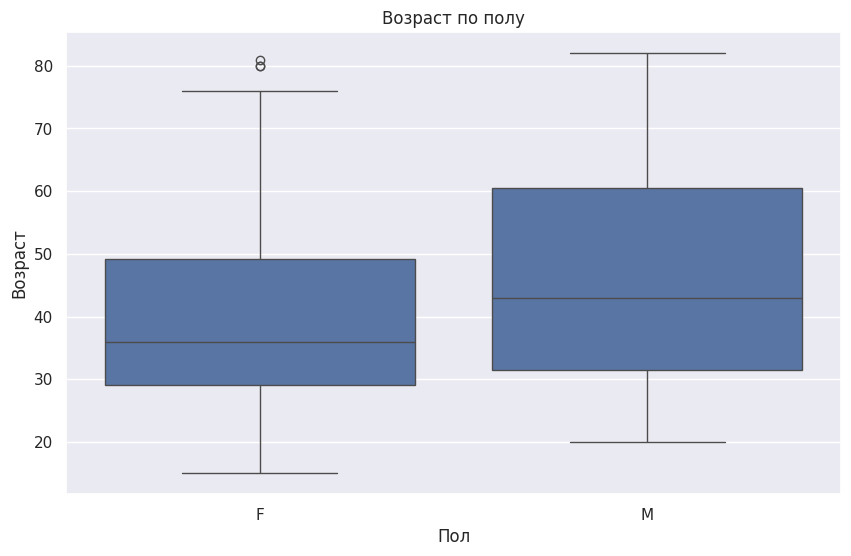

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Age', data=train)
plt.title('Возраст по полу')
plt.xlabel('Пол')
plt.ylabel('Возраст')
plt.show()

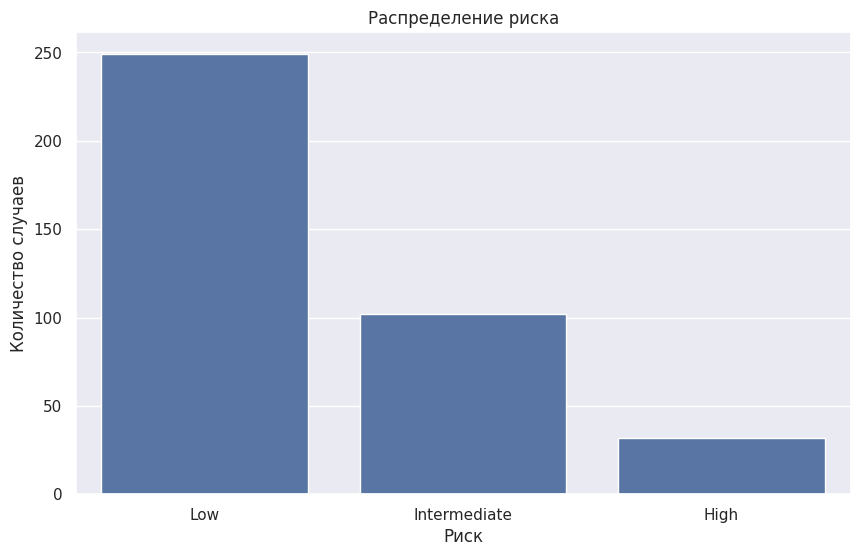

In [ ]:
# Визуализация для признака 'Risk'
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk', data=train)
plt.title('Распределение риска')
plt.xlabel('Риск')
plt.ylabel('Количество случаев')
plt.show()

Гистограмма показывает распределение уровней риска в наборе данных. График позволяет увидеть, какие уровни риска наиболее распространены и как часто встречаются различные категории риска.

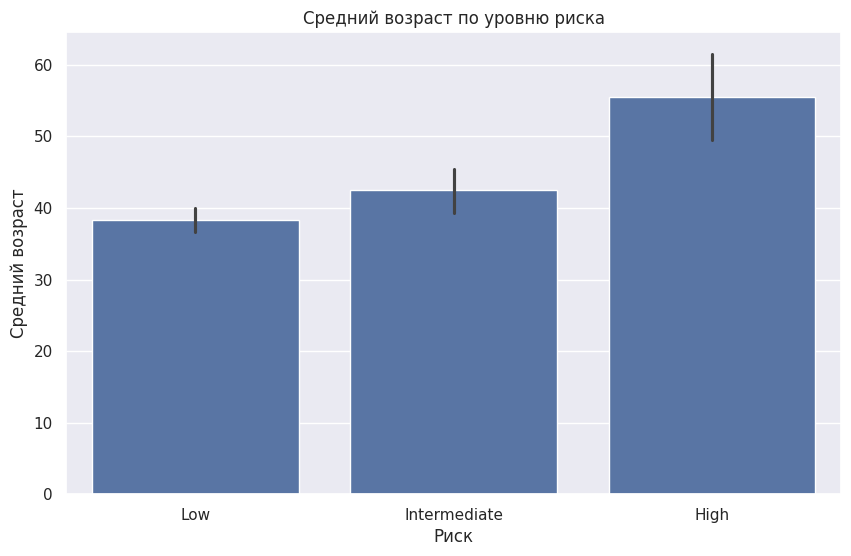

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Risk', y='Age', data=train)
plt.title('Средний возраст по уровню риска')
plt.xlabel('Риск')
plt.ylabel('Средний возраст')
plt.show()

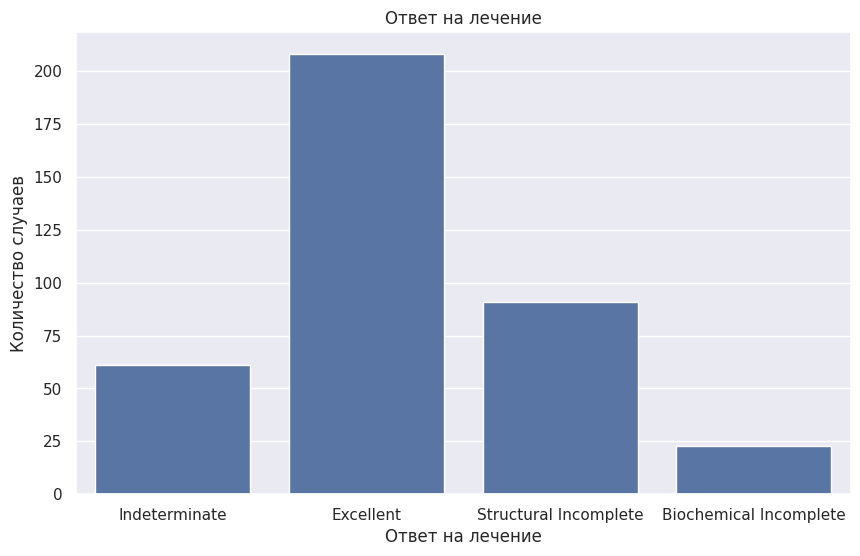

In [ ]:
# Визуализация для признака 'Response'
plt.figure(figsize=(10, 6))
sns.countplot(x='Response', data=train)
plt.title('Ответ на лечение')
plt.xlabel('Ответ на лечение')
plt.ylabel('Количество случаев')
plt.show()

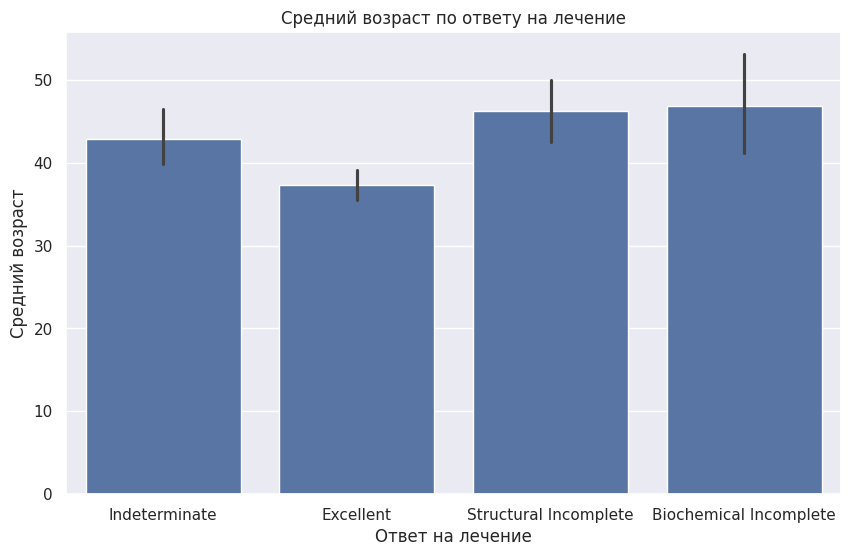

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response', y='Age', data=train)
plt.title('Средний возраст по ответу на лечение')
plt.xlabel('Ответ на лечение')
plt.ylabel('Средний возраст')
plt.show()

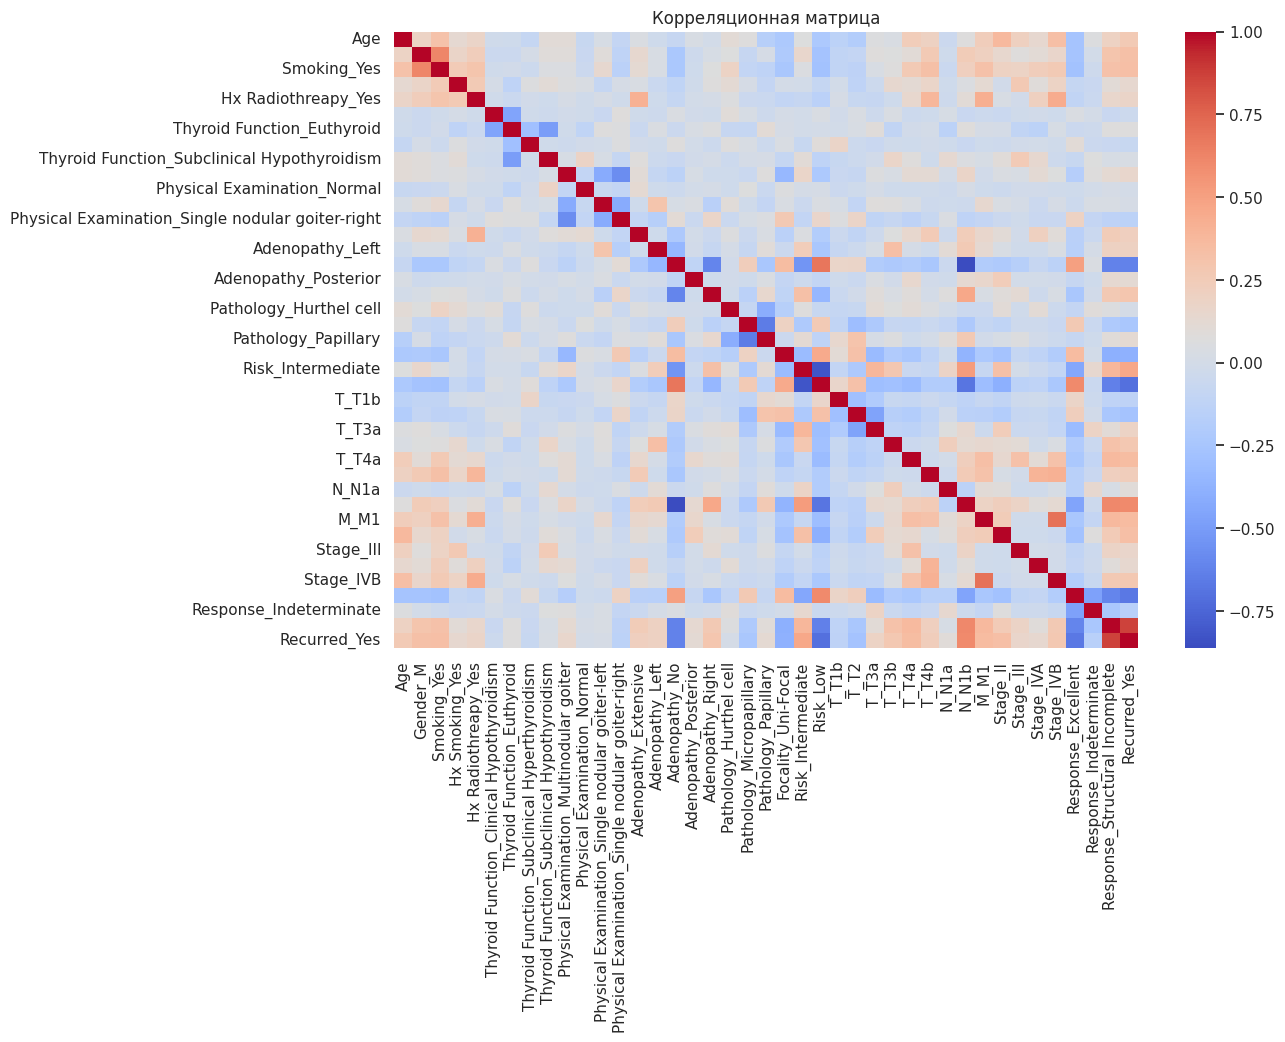

In [ ]:
# Групповые визуализации

# Корреляционная матрица
plt.figure(figsize=(12, 8))
sns.heatmap(train_encoded.corr(), annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

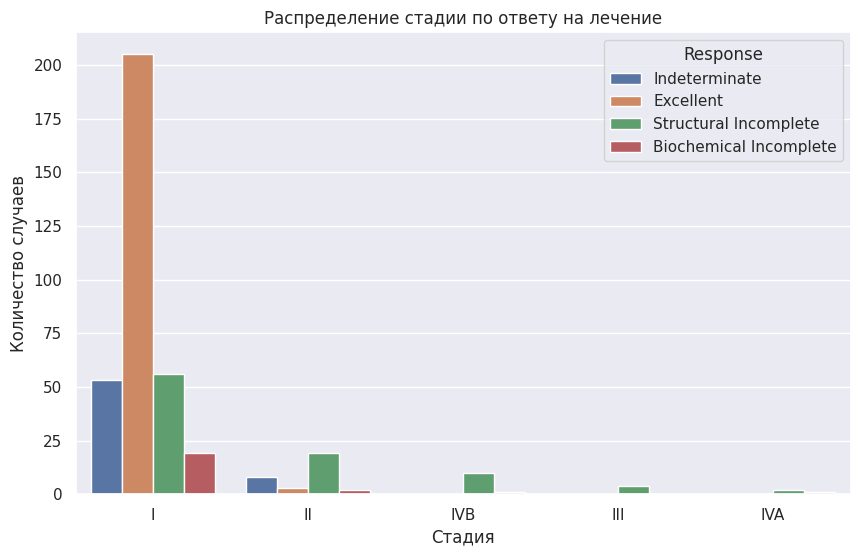

In [ ]:
# Распределение 'Stage' по 'Response'
plt.figure(figsize=(10, 6))
sns.countplot(x='Stage', hue='Response', data=train)
plt.title('Распределение стадии по ответу на лечение')
plt.xlabel('Стадия')
plt.ylabel('Количество случаев')
plt.show()

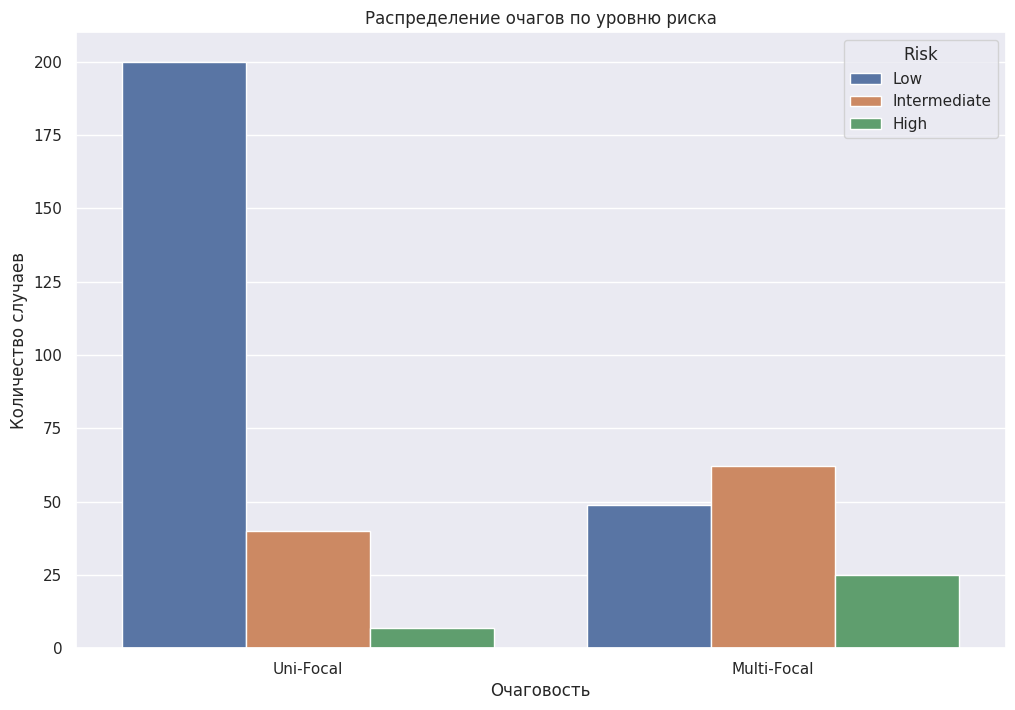

In [ ]:
# Распределение 'Focality' по 'Risk'
plt.figure(figsize=(12, 8))
sns.countplot(x='Focality', hue='Risk', data=train)
plt.title('Распределение очагов по уровню риска')
plt.xlabel('Очаговость')
plt.ylabel('Количество случаев')
plt.show()

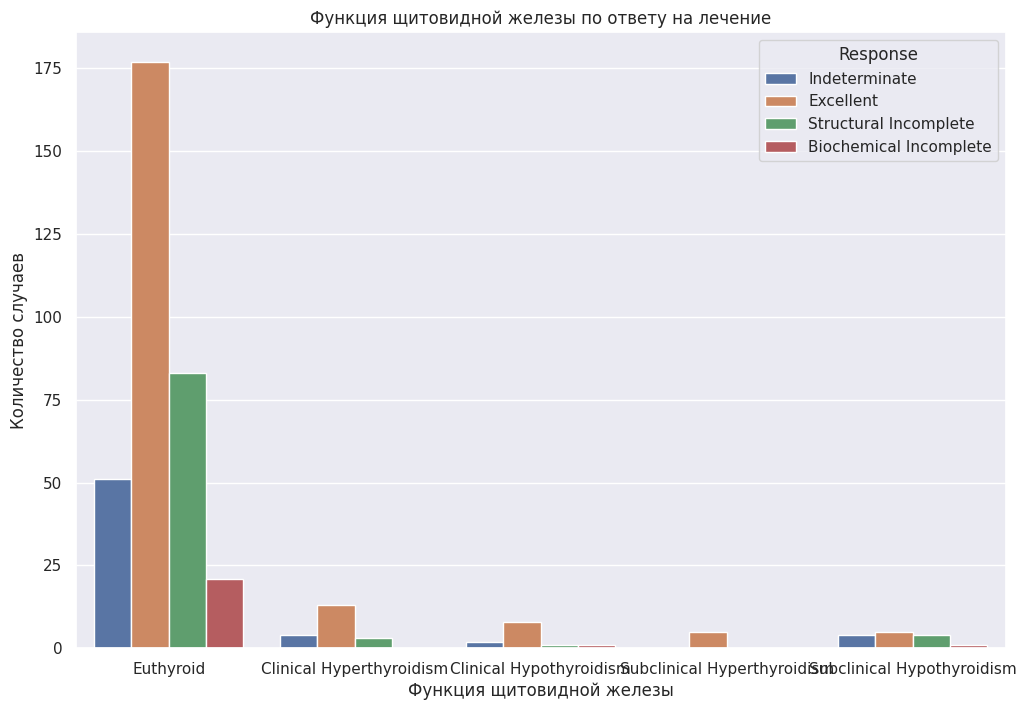

In [ ]:
# Распределение 'Thyroid Function' по 'Response'
plt.figure(figsize=(12, 8))
sns.countplot(x='Thyroid Function', hue='Response', data=train)
plt.title('Функция щитовидной железы по ответу на лечение')
plt.xlabel('Функция щитовидной железы')
plt.ylabel('Количество случаев')
plt.show()